In [268]:
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from ddot import Ontology

In [2]:
plt.rcParams['svg.fonttype'] = 'none'

V_SMALL_SIZE = 8
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=V_SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def create_scatter_plot_genes(X, Y, x_title, y_title):
    
    scatter_df = pd.DataFrame({x_title: X, y_title: Y})
    
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=scatter_df, x=x_title, y=y_title, s=35, ax=ax)
    
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()])  # max of both axes
        #-0.3, 1.0
    ]
    plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    return fig

In [4]:
def create_scatter_plot_systems(X, Y, H, x_title, y_title):
    
    scatter_df = pd.DataFrame({x_title: X, y_title: Y, 'hue': H})
    
    fig, ax = plt.subplots(figsize=(6,6))
    sns.scatterplot(data=scatter_df, x=x_title, y=y_title, hue='hue', s=35, ax=ax)
    
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    lims = [
        #np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        #np.max([ax.get_xlim(), ax.get_ylim()])  # max of both axes
        -0.3, 1.0
    ]
    plt.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    return fig

In [253]:
def create_histogram(data, x_title, y_title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.hist(x=data, bins=24, range=(0, 240), alpha=0.7, rwidth=0.85)
    ax.grid(False)
    ax.xaxis.set_ticks([i for i in range(0, 241, 10)])
    ax.yaxis.set_ticks([i for i in range(0, 9, 1)])
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.show()
    return fig

In [6]:
def create_line_curve(X, Y, x_title, y_title, x_lim, y_lim):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.plot(X, Y)
    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.show()
    return fig

In [7]:
def create_kaplan_meier(T1, T2, E1, E2, entity):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    kmf_d = KaplanMeierFitter()
    
    kmf_d = kmf_d.fit(T1, event_observed=E1, label='Sensitive (n = ' + str(len(T1)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Sensitive): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T2, event_observed=E2, label='Resistant (n = ' + str(len(T2)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    ax.set_xlim(0, 120)
    ax.set_ylim(0.0, 1.1)
    ax.set_xlabel('Overall Survival Months')
    ax.set_ylabel('Surviving Fractions')
    plt.title(entity + " Survival plot")
    plt.show()
    
    return fig

In [8]:
def create_kaplan_meier_3sets(T1, T2, T3, E1, E2, E3, entity):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    kmf_d = KaplanMeierFitter()
    
    kmf_d = kmf_d.fit(T1, event_observed=E1, label='Sensitive (n = ' + str(len(T1)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Sensitive): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T2, event_observed=E2, label='Partially Resistant (n = ' + str(len(T2)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Partially Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T3, event_observed=E3, label='Strongly Resistant (n = ' + str(len(T3)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Strongly Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    ax.set_xlim(0, 120)
    ax.set_ylim(0.0, 1.1)
    ax.set_xlabel('Overall Survival Months')
    ax.set_ylabel('Surviving Fractions')
    plt.title(entity + " Survival plot")
    plt.show()
    
    return fig

In [9]:
def create_kaplan_meier_all(T1, T2, T3, E1, E2, E3, entity):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    kmf_d = KaplanMeierFitter()
    
    kmf_d = kmf_d.fit(T1, event_observed=E1, label='Sensitive (n = ' + str(len(T1)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Sensitive): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T2, event_observed=E2, label='Resistant (n = ' + str(len(T2)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T3, event_observed=E3, label='Untreated (n = ' + str(len(T3)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Untreated): {:.1f}'.format(kmf_d.median_survival_time_))
    
    ax.set_xlim(0, 120)
    ax.set_ylim(0.0, 1.1)
    ax.set_xlabel('Overall Survival Months')
    ax.set_ylabel('Surviving Fractions')
    plt.title(entity + " Survival plot")
    plt.show()
    
    return fig

In [10]:
def create_kaplan_meier_4sets(T1, T2, T3, T4, E1, E2, E3, E4, entity):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    kmf_d = KaplanMeierFitter()
    
    kmf_d = kmf_d.fit(T1, event_observed=E1, label='Sensitive (n = ' + str(len(T1)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Sensitive): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T2, event_observed=E2, label='Partially Resistant (n = ' + str(len(T2)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Partially Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T3, event_observed=E3, label='Strongly Resistant (n = ' + str(len(T3)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Strongly Resistant): {:.1f}'.format(kmf_d.median_survival_time_))
    
    kmf_d = kmf_d.fit(T4, event_observed=E4, label='Untreated (n = ' + str(len(T4)) + ')')
    kmf_d.plot(ci_show=False, ax=ax, show_censors=True, censor_styles={"marker": "|"})
    print('Median Survival (Untreated): {:.1f}'.format(kmf_d.median_survival_time_))
    
    ax.set_xlim(0, 120)
    ax.set_ylim(0.0, 1.1)
    ax.set_xlabel('Overall Survival Months')
    ax.set_ylabel('Surviving Fractions')
    plt.title(entity + " Survival plot")
    plt.show()
    
    return fig

In [113]:
def stratify_samples(genie_drug_data, drug, fraction, is_inverted=False):

    data_size = len(genie_drug_data)
    category_size = int(data_size * fraction)
    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)

    sensitive_list = []
    resistant_list = []
    temp_list = []
    for i in range(category_size):
        sample_id = genie_drug_data.at[i, 'Sample_ID']
        temp_list.append(sample_id)

    if is_inverted:
        resistant_list = temp_list
    else:
        sensitive_list = temp_list
    
    temp_list = []
    for i in range(data_size - category_size, data_size):
        sample_id = genie_drug_data.at[i, 'Sample_ID']
        temp_list.append(sample_id)

    if is_inverted:
        sensitive_list = temp_list
    else:
        resistant_list = temp_list

    return sensitive_list, resistant_list

In [12]:
def stratify_samples_2(genie_drug_data, drug, is_inverted=False):

    median = np.median(genie_drug_data[drug])
    data_size = len(genie_drug_data)
    sensitive_list = []
    resistant_list = []
    for i,row in genie_drug_data.iterrows():
        if row[drug] < median:
            sensitive_list.append(row['Sample_ID'])
        else:
            resistant_list.append(row['Sample_ID'])

    if is_inverted:
        temp_list = sensitive_list
        sensitive_list = resistant_list
        resistant_list = temp_list

    return sensitive_list, resistant_list

In [133]:
def stratify_samples_3sets(genie_drug_data, drug, is_inverted=False):

    median = np.median(genie_drug_data[drug])
    std_dev = np.std(genie_drug_data[drug])
    data_size = len(genie_drug_data)
    sensitive_list = []
    part_res_list = []
    strong_res_list = []
    for i,row in genie_drug_data.iterrows():
        if row[drug] < median:
            sensitive_list.append(row['Sample_ID'])
        if row[drug] >= median:
            part_res_list.append(row['Sample_ID'])
        if row[drug] > median + std_dev:
            strong_res_list.append(row['Sample_ID'])

    return sensitive_list, part_res_list, strong_res_list

In [109]:
def create_survival_overall(response_df):

    survival_list = []
    for i, row in response_df.iterrows():
        survival = row['Overall_Survival_Months']
        response = row['response']
        status = row['Overall_Survival_Status']
        event = 1
        if ('LIVING' in status)  or (survival > 120):
            event = 0
        temp_df = pd.DataFrame([[survival, response, event]], columns=['Survival_Months', 'response', 'event'])
        survival_list.append(temp_df)

    survival_df = pd.concat(survival_list, axis=0, ignore_index=True)
    return survival_df

In [15]:
def genie_analysis(test_data, genie_drug_data, drug, res_type=1, fold_size=5, fraction=0.5):
    
    for k in range(1, fold_size+1):
        
        sensitive_dict = dict()
        resistant_dict = dict()
        genie_drug_data[drug] = 0.0
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        if res_type == 1:
            sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction=fraction)
        else:
            sensitive_list, resistant_list = stratify_samples_2(genie_drug_data, drug)

        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

        genie_drug_data['response'] = -1
        for i, sample in enumerate(genie_drug_data['Sample_ID']):
            if sample in sensitive_dict:
                genie_drug_data.at[i, 'response'] = 1

            elif sample in resistant_dict:
                genie_drug_data.at[i, 'response'] = 0

        survival_df = create_survival_overall(genie_drug_data)

        T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
        T2 = list(survival_df[survival_df['response'] == 0]['Survival_Months'])
        E1 = list(survival_df[survival_df['response'] == 1]['event'])
        E2 = list(survival_df[survival_df['response'] == 0]['event'])

        #print('Sensitive median survival:', np.median(T1))
        #print('Resistant median survival:', np.median(T2))
        print('p-value: {:.4f}'.format(logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value))
        km_fig = create_kaplan_meier(T1, T2, E1, E2, drug)

    #return survival_df, km_fig

In [16]:
def genie_analysis_all(test_data, genie_drug_data, genie_non_drug_data, drug, res_type=1, fold_size=5, fraction=0.5):
    
    for k in range(1, fold_size+1):
        
        sensitive_dict = dict()
        resistant_dict = dict()
        genie_drug_data[drug] = 0.0
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        if res_type == 1:
            sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction=fraction)
        else:
            sensitive_list, resistant_list = stratify_samples_2(genie_drug_data, drug)

        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

        genie_drug_data['response'] = -1
        for i, sample in enumerate(genie_drug_data['Sample_ID']):
            if sample in sensitive_dict:
                genie_drug_data.at[i, 'response'] = 1

            elif sample in resistant_dict:
                genie_drug_data.at[i, 'response'] = 0

        survival_df = create_survival_overall(genie_drug_data)
        
        genie_non_drug_data['response'] = -1
        non_survival_df = create_survival_overall(genie_non_drug_data)

        T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
        T2 = list(survival_df[survival_df['response'] == 0]['Survival_Months'])
        T3 = list(non_survival_df['Survival_Months'])
        E1 = list(survival_df[survival_df['response'] == 1]['event'])
        E2 = list(survival_df[survival_df['response'] == 0]['event'])
        E3 = list(non_survival_df['event'])

        #print('Sensitive median survival:', np.median(T1))
        #print('Resistant median survival:', np.median(T2))
        p_val_treated = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
        p_val_untreated = logrank_test(durations_A=T2, durations_B=T3, event_observed_A=E2, event_observed_B=E3).p_value
        print('Treated', p_val_treated)
        print('Treated Res vs Untreated', p_val_untreated)
        km_fig = create_kaplan_meier_all(T1, T2, T3, E1, E2, E3, drug)
        km_fig.savefig('../plots/figure6/survival_' + str(k) + '_April_19.svg')

    #return survival_df, km_fig

In [17]:
def genie_analysis_3sets(test_data, genie_drug_data, drug, fold_size=5):
    
    for k in range(1, fold_size+1):
        
        sensitive_dict = dict()
        part_res_dict = dict()
        strong_res_dict = dict()
        genie_drug_data[drug] = 0.0
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, part_res_list, strong_res_list = stratify_samples_3sets(genie_drug_data, drug)
        
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in part_res_list:
            val = 0
            if sample in part_res_dict:
                val = part_res_dict[sample]
            part_res_dict[sample] = val + 1
            
        for sample in strong_res_list:
            val = 0
            if sample in strong_res_dict:
                val = strong_res_dict[sample]
            strong_res_dict[sample] = val + 1

        genie_drug_data['response'] = 0
        for i, sample in enumerate(genie_drug_data['Sample_ID']):
            if sample in sensitive_dict:
                genie_drug_data.at[i, 'response'] = 1

            elif sample in part_res_dict:
                genie_drug_data.at[i, 'response'] = -1

            elif sample in strong_res_dict:
                genie_drug_data.at[i, 'response'] = -2

        survival_df = create_survival_overall(genie_drug_data)

        T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
        T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
        T3 = list(survival_df[survival_df['response'] == -2]['Survival_Months'])
        E1 = list(survival_df[survival_df['response'] == 1]['event'])
        E2 = list(survival_df[survival_df['response'] == -1]['event'])
        E3 = list(survival_df[survival_df['response'] == -2]['event'])

        #print('Sensitive median survival:', np.median(T1))
        #print('Part Res median survival:', np.median(T2))
        #print('Strong Res median survival:', np.median(T3))
        p_val_part = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
        p_val_strong = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
        print('Part res', p_val_part)
        print('Strong res', p_val_strong)
        
        km_fig = create_kaplan_meier_3sets(T1, T2, T3, E1, E2, E3, drug)

In [18]:
def genie_analysis_4sets(test_data, genie_drug_data, genie_non_drug_data, drug, fold_size=5):
    
    for k in range(1, fold_size+1):
        
        sensitive_dict = dict()
        part_res_dict = dict()
        strong_res_dict = dict()
        genie_drug_data[drug] = 0.0
        genie_non_drug_data[drug] = 0.0
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        for i, row in genie_non_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_non_drug_data.at[i, drug] = p_auc
        genie_non_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, part_res_list, strong_res_list = stratify_samples_3sets(genie_drug_data, drug)
        
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in part_res_list:
            val = 0
            if sample in part_res_dict:
                val = part_res_dict[sample]
            part_res_dict[sample] = val + 1
            
        for sample in strong_res_list:
            val = 0
            if sample in strong_res_dict:
                val = strong_res_dict[sample]
            strong_res_dict[sample] = val + 1

        genie_drug_data['response'] = 0
        for i, sample in enumerate(genie_drug_data['Sample_ID']):
            if sample in sensitive_dict:
                genie_drug_data.at[i, 'response'] = 1

            elif sample in part_res_dict:
                genie_drug_data.at[i, 'response'] = -1

            elif sample in strong_res_dict:
                genie_drug_data.at[i, 'response'] = -2

        survival_df = create_survival_overall(genie_drug_data)
        
        genie_non_drug_data['response'] = -1
        non_survival_df = create_survival_overall(genie_non_drug_data)
        
        T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
        T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
        T3 = list(survival_df[survival_df['response'] == -2]['Survival_Months'])
        E1 = list(survival_df[survival_df['response'] == 1]['event'])
        E2 = list(survival_df[survival_df['response'] == -1]['event'])
        E3 = list(survival_df[survival_df['response'] == -2]['event'])

        T4 = list(non_survival_df['Survival_Months'])
        E4 = list(non_survival_df['event'])

        p_val_treated = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
        p_val_untreated = logrank_test(durations_A=T3, durations_B=T4, event_observed_A=E3, event_observed_B=E4).p_value
        print('Treated Sens vs Strong res', p_val_treated)
        print('Treated Strong Res vs Untreated', p_val_untreated)
        km_fig = create_kaplan_meier_4sets(T1, T2, T3, T4, E1, E2, E3, E4, drug)

    #return survival_df, km_fig

In [291]:
def genie_analysis_majority(test_data, genie_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    resistant_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, resistant_list = stratify_samples_2(genie_drug_data, drug)
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_dict:
            if resistant_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1

    survival_df = create_survival_overall(genie_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
        
    print('p-value: {:.4f}'.format(logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value))
    km_fig = create_kaplan_meier(T1, T2, E1, E2, drug)

    return survival_df, km_fig

In [292]:
def genie_analysis_majority_all(test_data, genie_drug_data, genie_non_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    resistant_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, resistant_list = stratify_samples_2(genie_drug_data, drug)
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_dict:
            if resistant_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1

    survival_df = create_survival_overall(genie_drug_data)
    
    genie_non_drug_data['response'] = 0
    non_survival_df = create_survival_overall(genie_non_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    T3 = list(non_survival_df['Survival_Months'])
    E3 = list(non_survival_df['event'])
        
    p_val_treated = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    p_val_sens_untreated = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
    p_val_res_untreated = logrank_test(durations_A=T2, durations_B=T3, event_observed_A=E2, event_observed_B=E3).p_value
    print('Treated', p_val_treated)
    print('Treated Sens vs Untreated', p_val_sens_untreated)
    print('Treated Res vs Untreated', p_val_res_untreated)
    km_fig = create_kaplan_meier_all(T1, T2, T3, E1, E2, E3, drug)

    return survival_df, km_fig

In [260]:
def genie_analysis_majority_2sets(test_data, genie_drug_data, drug, cut_off=6, fold_size=5, resp_th=5):
    
    sensitive_dict = dict()
    resistant_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, resistant_list = stratify_samples_2(genie_drug_data, drug)
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    resistant_samples = []
    sensitive_samples = []
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                sensitive_samples.append(sample)
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_dict:
            if resistant_dict[sample] >= resp_th:
                resistant_samples.append(sample)
                genie_drug_data.at[i, 'response'] = -1

                
    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True, ascending=True)
    strong_sens_i = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample not in sensitive_samples:
            continue
        else:
            if strong_sens_i < cut_off + 1:
                genie_drug_data.at[i, 'response'] = 2
                strong_sens_i += 1
            else:
                genie_drug_data.at[i, 'response'] = 1
    
    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True, ascending=False)
    strong_res_i = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample not in resistant_samples:
            continue
        else:
            if strong_res_i < cut_off:
                genie_drug_data.at[i, 'response'] = -2
                strong_res_i += 1
            else:
                genie_drug_data.at[i, 'response'] = -1
    
    survival_df = create_survival_overall(genie_drug_data)
    
    T1 = list(survival_df[survival_df['response'] > 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] < -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] > 1]['event'])
    E2 = list(survival_df[survival_df['response'] < -1]['event'])
    
    T3 = list(survival_df[survival_df['response'] == 0]['Survival_Months'])
    E3 = list(survival_df[survival_df['response'] == 0]['event'])
    
    print(np.median(T1), np.std(T1))
    create_histogram(T1, 'Survival_Months', 'Frequency')
    print(np.median(T2), np.std(T2))
    create_histogram(T2, 'Survival_Months', 'Frequency')
    print(np.median(T3), np.std(T3))
    create_histogram(T3, 'Survival_Months', 'Frequency')
    print(np.max(T3))
        
    p_val = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    print("P-value:", p_val)
    
    km_fig = create_kaplan_meier(T1, T2, E1, E2, drug)
    #km_fig = create_kaplan_meier_3sets(T1, T2, T3, E1, E2, E3, drug)

    return km_fig

In [173]:
def genie_analysis_majority_3sets(test_data, genie_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    part_res_dict = dict()
    strong_res_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, part_res_list, strong_res_list = stratify_samples_3sets(genie_drug_data, drug)
        
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in part_res_list:
            val = 0
            if sample in part_res_dict:
                val = part_res_dict[sample]
            part_res_dict[sample] = val + 1
            
        for sample in strong_res_list:
            val = 0
            if sample in strong_res_dict:
                val = strong_res_dict[sample]
            strong_res_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in part_res_dict:
            if part_res_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1
                
        if sample in strong_res_dict:
            if strong_res_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -2

    survival_df = create_survival_overall(genie_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    T3 = list(survival_df[survival_df['response'] == -2]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    E3 = list(survival_df[survival_df['response'] == -2]['event'])
        
    p_val_t1_t2 = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    p_val_t1_t3 = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
    print('Treated Sens vs Part res', p_val_t1_t2)
    print('Treated Sens vs Strong res', p_val_t1_t3)
    km_fig = create_kaplan_meier_3sets(T1, T2, T3, E1, E2, E3, drug)

    return km_fig

In [312]:
def genie_analysis_majority_4sets(test_data, genie_drug_data, genie_non_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    part_res_dict = dict()
    strong_res_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        sensitive_list, part_res_list, strong_res_list = stratify_samples_3sets(genie_drug_data, drug)
        
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in part_res_list:
            val = 0
            if sample in part_res_dict:
                val = part_res_dict[sample]
            part_res_dict[sample] = val + 1
            
        for sample in strong_res_list:
            val = 0
            if sample in strong_res_dict:
                val = strong_res_dict[sample]
            strong_res_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in part_res_dict:
            if part_res_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1
                
        if sample in strong_res_dict:
            if strong_res_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -2

    survival_df = create_survival_overall(genie_drug_data)
    
    genie_non_drug_data['response'] = 0
    non_survival_df = create_survival_overall(genie_non_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    T3 = list(survival_df[survival_df['response'] == -2]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    E3 = list(survival_df[survival_df['response'] == -2]['event'])
    
    T4 = list(non_survival_df['Survival_Months'])
    E4 = list(non_survival_df['event'])
    
    p_val_t1_t2 = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    p_val_t1_t3 = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
    p_val_t1_t4 = logrank_test(durations_A=T1, durations_B=T4, event_observed_A=E1, event_observed_B=E4).p_value
    p_val_t2_t4 = logrank_test(durations_A=T2, durations_B=T4, event_observed_A=E2, event_observed_B=E4).p_value
    p_val_t3_t4 = logrank_test(durations_A=T3, durations_B=T4, event_observed_A=E3, event_observed_B=E4).p_value
    print('Treated Sens vs Part res', p_val_t1_t2)
    print('Treated Sens vs Strong res', p_val_t1_t3)
    print('Treated Sens vs Untreated', p_val_t1_t4)
    print('Treated Part Res vs Untreated', p_val_t2_t4)
    print('Treated Strong Res vs Untreated', p_val_t3_t4)
    km_fig = create_kaplan_meier_4sets(T1, T2, T3, T4, E1, E2, E3, E4, drug)

    return survival_df, km_fig

In [311]:
def genie_analysis_avg(test_data, genie_drug_data, drug, fraction=0.16, fold_size=5):
    
    genie_drug_data[drug] = 0.0

    all_predict_data_list = np.zeros((fold_size, len(test_data)))
    for k in range(1, fold_size+1): 
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        all_predict_data_list[k-1] = predict_data
    all_predict_data = np.max(all_predict_data_list, axis=0)
    
    pred_df = pd.Series(all_predict_data, name='pred')
    pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

    for i, row in genie_drug_data.iterrows():
        sampleId = row['Sample_ID']
        p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
        genie_drug_data.at[i, drug] = p_auc

    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
    sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction=fraction)
    
    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_list:
            genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_list:
            genie_drug_data.at[i, 'response'] = -1
    survival_df = create_survival_overall(genie_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    
    p_val_treated = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    print('Treated', p_val_treated)
    km_fig = create_kaplan_meier(T1, T2, E1, E2, drug)
    
    return km_fig

In [310]:
def genie_analysis_avg_all(test_data, genie_drug_data, genie_non_drug_data, drug, fraction=0.16, fold_size=5):
    
    genie_drug_data[drug] = 0.0

    all_predict_data_list = np.zeros((fold_size, len(test_data)))
    for k in range(1, fold_size+1): 
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        all_predict_data_list[k-1] = predict_data
    all_predict_data = np.max(all_predict_data_list, axis=0)
    
    pred_df = pd.Series(all_predict_data, name='pred')
    pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

    for i, row in genie_drug_data.iterrows():
        sampleId = row['Sample_ID']
        p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
        genie_drug_data.at[i, drug] = p_auc

    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
    sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction=fraction)
    
    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_list:
            genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_list:
            genie_drug_data.at[i, 'response'] = -1
    survival_df = create_survival_overall(genie_drug_data)
    
    genie_non_drug_data['response'] = 0
    non_survival_df = create_survival_overall(genie_non_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    
    T3 = list(non_survival_df['Survival_Months'])
    E3 = list(non_survival_df['event'])
    
    p_val_treated = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    p_val_sens_untreated = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
    p_val_res_untreated = logrank_test(durations_A=T2, durations_B=T3, event_observed_A=E2, event_observed_B=E3).p_value
    print('Treated', p_val_treated)
    print('Treated Sens vs Untreated', p_val_sens_untreated)
    print('Treated Res vs Untreated', p_val_res_untreated)
    km_fig = create_kaplan_meier_all(T1, T2, T3, E1, E2, E3, drug)
    
    return km_fig

In [309]:
def genie_analysis_avg_4sets(test_data, genie_drug_data, genie_non_drug_data, drug, fold_size=5, fraction=0.16):
    
    genie_drug_data[drug] = 0.0

    all_predict_data_list = np.zeros((fold_size, len(test_data)))
    for k in range(1, fold_size+1): 
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        all_predict_data_list[k-1] = predict_data
    all_predict_data = np.mean(all_predict_data_list, axis=0)
    
    pred_df = pd.Series(all_predict_data, name='pred')
    pred_df = pd.concat([test_data, pred_df], axis=1)[['cell_line', 'smiles', 'pred']]

    for i, row in genie_drug_data.iterrows():
        sampleId = row['Sample_ID']
        p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['pred'])[0]
        genie_drug_data.at[i, drug] = p_auc

    genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
    sensitive_list, part_res_list, strong_res_list = stratify_samples_3sets(genie_drug_data, drug)
    
    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_list:
            genie_drug_data.at[i, 'response'] = 1
                
        if sample in part_res_list:
            genie_drug_data.at[i, 'response'] = -1
                
        if sample in strong_res_list:
            genie_drug_data.at[i, 'response'] = -2

    survival_df = create_survival_overall(genie_drug_data)
    
    genie_non_drug_data['response'] = 0
    non_survival_df = create_survival_overall(genie_non_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    T3 = list(survival_df[survival_df['response'] == -2]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    E3 = list(survival_df[survival_df['response'] == -2]['event'])
    
    T4 = list(non_survival_df['Survival_Months'])
    E4 = list(non_survival_df['event'])
        
    p_val_treated = logrank_test(durations_A=T1, durations_B=T3, event_observed_A=E1, event_observed_B=E3).p_value
    p_val_untreated = logrank_test(durations_A=T3, durations_B=T4, event_observed_A=E3, event_observed_B=E4).p_value
    print('Treated Sens vs Strong res', p_val_treated)
    print('Treated Strong Res vs Untreated', p_val_untreated)
    km_fig = create_kaplan_meier_4sets(T1, T2, T3, T4, E1, E2, E3, E4, drug)

    return p_val_part, p_val_strong, km_fig

In [308]:
def genie_analysis_gene_alterations(alteration_data, sample_map, genie_drug_data, genie_non_drug_data, title, is_resistant):
    
    response_list = []
    for s, i in sample_map.items():
        response = alteration_data[i]
        if is_resistant:
            response = 1 - response
        temp_df = pd.DataFrame([[s, response]], columns=['Sample_ID', 'response'])
        response_list.append(temp_df)

    response_df = pd.concat(response_list, axis=0, ignore_index=True)
    merged_response_data = pd.merge(response_df, genie_drug_data, on='Sample_ID')
    survival_df = create_survival_overall(merged_response_data)
    
    genie_non_drug_data['response'] = 0
    non_survival_df = create_survival_overall(genie_non_drug_data)
        
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
    
    T3 = list(non_survival_df['Survival_Months'])
    E3 = list(non_survival_df['event'])
    
    p_val_treated = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    p_val_untreated = logrank_test(durations_A=T2, durations_B=T3, event_observed_A=E2, event_observed_B=E3).p_value
    print('Treated', p_val_treated)
    print('Treated -ve vs Untreated', p_val_untreated)
    km_fig = create_kaplan_meier_all(T1, T2, T3, E1, E2, E3, title)
    
    #km_fig = create_kaplan_meier(T1, T2, E1, E2, title)
    
    return survival_df, km_fig

In [306]:
def genie_analysis_gene_embeddings(sys_genes, test_data, genie_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    resistant_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        
        all_embed_data = []
        for gene in sys_genes:
            embedding_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/hidden_genie_428/' + gene + '.hidden')
            all_embed_data.append(embedding_data)
        pca = PCA(n_components=1)
        all_gene_activity = pca.fit_transform(np.array(all_embed_data).transpose())
        embed_df = pd.Series(all_gene_activity[:, 0], name='embed')
        pred_df = pd.concat([test_data, pred_df, embed_df], axis=1)[['cell_line', 'smiles', 'pred', 'embed']]

        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['embed'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)
        
        is_inverted = False
        if stats.spearmanr(pred_df['pred'], pred_df['embed'])[0] < 0:
            is_inverted = True
        sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction, is_inverted=is_inverted)
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_dict:
            if resistant_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1

    survival_df = create_survival_overall(genie_drug_data)
    
    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
        
    p_val = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    km_fig = create_kaplan_meier(T1, T2, E1, E2, gene)

    return p_val, km_fig

In [307]:
def genie_analysis_system(system_name, test_data, genie_drug_data, drug, fold_size=5, fraction=0.5, resp_th=5):
    
    sensitive_dict = dict()
    resistant_dict = dict()
    genie_drug_data[drug] = 0.0
    corr_sum = 0.0
    count = 0
    for k in range(1, fold_size+1):
        
        predict_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/predict_genie_428.txt')
        pred_df = pd.Series(predict_data, name='pred')
        
        embedding_data = np.loadtxt('../models/model_ctg_av_' + drug + '_auc_' + str(k) + '/hidden_genie_428/' + system_name + '.hidden')
        pca = PCA(n_components=1)
        system_activity = pca.fit_transform(embedding_data)
        embed_df = pd.Series(system_activity[:, 0], name='embed')
        pred_df = pd.concat([test_data, pred_df, embed_df], axis=1)[['cell_line', 'smiles', 'pred', 'embed']]
        
        for i, row in genie_drug_data.iterrows():
            sampleId = row['Sample_ID']
            p_auc = list(pred_df[pred_df['cell_line'] == sampleId]['embed'])[0]
            genie_drug_data.at[i, drug] = p_auc
        genie_drug_data.sort_values(by=drug, inplace=True, ignore_index=True)

        is_inverted = False
        if stats.spearmanr(pred_df['pred'], pred_df['embed'])[0] < 0:
            is_inverted = True
        sensitive_list, resistant_list = stratify_samples(genie_drug_data, drug, fraction, is_inverted=is_inverted)
        for sample in sensitive_list:
            val = 0
            if sample in sensitive_dict:
                val = sensitive_dict[sample]
            sensitive_dict[sample] = val + 1

        for sample in resistant_list:
            val = 0
            if sample in resistant_dict:
                val = resistant_dict[sample]
            resistant_dict[sample] = val + 1

    genie_drug_data['response'] = 0
    for i, sample in enumerate(genie_drug_data['Sample_ID']):
        if sample in sensitive_dict:
            if sensitive_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = 1
                
        if sample in resistant_dict:
            if resistant_dict[sample] >= resp_th:
                genie_drug_data.at[i, 'response'] = -1

    survival_df = create_survival_overall(genie_drug_data)

    T1 = list(survival_df[survival_df['response'] == 1]['Survival_Months'])
    T2 = list(survival_df[survival_df['response'] == -1]['Survival_Months'])
    E1 = list(survival_df[survival_df['response'] == 1]['event'])
    E2 = list(survival_df[survival_df['response'] == -1]['event'])
        
    p_val = logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value
    #print('p-value: {:.4f}'.format(logrank_test(durations_A=T1, durations_B=T2, event_observed_A=E1, event_observed_B=E2).p_value))
    km_fig = create_kaplan_meier(T1, T2, E1, E2, system_name)

    return p_val, km_fig

In [28]:
def gene_importance(drug, cell_features, genie_features, gene_list, fold_size=5):
    
    all_cell_coef = np.zeros(len(gene_list))
    all_genie_coef = np.zeros(len(gene_list))
    for i in range(1, fold_size+1):
        
        modeldir = '../models/model_ctg_av_' + drug + '_auc_' + str(i)
        
        y_cell = np.loadtxt(modeldir + '/predict.txt')
        cell_test_df = pd.read_csv("../data/training_files_av/" + str(i) + "_test_av_" + drug + ".txt", sep='\t', header=None, names=['cell', 's', 'auc', 'd'])
        cell_lines_df = pd.read_csv('../data/training_files_av/cell2ind_av.txt', header=None, sep='\t', names=['I', 'C'])
        cell_sample_map = dict(zip(cell_lines_df.C, cell_lines_df.I))
        
        X_cell = np.empty(shape = (len(cell_test_df), len(cell_features[0, :])))
        for i, row in cell_test_df.iterrows():
            X_cell[i] = cell_features[int(cell_sample_map[row['cell']])]
            
        regr = RidgeCV(cv=5)
        regr.fit(X_cell, y_cell)
        cell_coef_df = pd.DataFrame(regr.coef_, index=gene_list, columns=['cell_coef'])
        cell_coef_df.sort_index()
        all_cell_coef += np.array(cell_coef_df['cell_coef'])

        y_genie = np.loadtxt(modeldir + '/predict_genie_428.txt')
        genie_samples = list(pd.read_csv('../data/GENIE/cell2ind_428.txt', header=None, sep='\t', names=['I', 'C'])['I'])
        genie_features_df = pd.DataFrame(genie_features, columns=gene_list, index=genie_samples)
        X_genie = genie_features_df.loc[genie_samples, gene_list]
        
        regr = RidgeCV(cv=5)
        regr.fit(X_genie, y_genie)
        genie_coef_df = pd.DataFrame(regr.coef_, index=gene_list, columns=['genie_coef'])
        genie_coef_df.sort_index()
        all_genie_coef += np.array(genie_coef_df['genie_coef'])
        
    all_cell_coef /= fold_size
    all_genie_coef /= fold_size
    fig = create_scatter_plot_genes(all_genie_coef, all_cell_coef, 'Gene Importance\n(Clinical samples)', 'Gene Importance\n(Cell lines)')
    print(stats.spearmanr(all_genie_coef, all_cell_coef)[0])
        
    return fig

In [29]:
def create_gene_rho(drug, gene_list, data_type, fold_size=5):
    
    for i in range(1, fold_size+1):
        modeldir = '../models/Test/model_ctg_av_' + drug + '_auc_' + str(i)
        pred = np.loadtxt(modeldir + '/predict' + data_type + '.txt')
        hiddendir = modeldir + '/hidden' + data_type
        
        outf = open(modeldir + '/gene_rho' + data_type + '.txt', "w")
        outf.write('Gene\tRho\tP_val\n')
        for gene in gene_list:
            gene_embedding = np.loadtxt(hiddendir + '/' + gene + '.hidden')
            rho, p_val = stats.spearmanr(pred, gene_embedding)
            result = '{}\t{:.3f}\t{:.3e}\n'.format(gene, rho, p_val)
            outf.write(result)
        outf.close()

In [30]:
def aggregate_gene_rho(drug, gene_list, data_type, fold_size=5):
    agg_gene_rho = []
    for i in range(1, fold_size+1):
        modeldir = '../models/Test/model_ctg_av_' + drug + '_auc_' + str(i)
        gene_rho_df = pd.read_csv(modeldir + '/gene_rho' + data_type + '.txt', sep='\t')[['Gene', 'Rho']]
        agg_gene_rho.append(gene_rho_df)
    agg_df = pd.concat(agg_gene_rho, ignore_index=True)
    agg_rho_df = pd.DataFrame(agg_df.groupby(['Gene']).mean())
    agg_rho_df.fillna(0, inplace=True)
    agg_rho_df.to_csv('../models/rlipp/' + drug + '_all_gene_rho' + data_type + '.txt', sep='\t', float_format='%.3f', index=True)

In [31]:
def get_all_genes(ddot_ont, term):    
    all_genes = set()
    for g in ddot_ont.term_2_gene[term]:
        all_genes.add(ddot_ont.genes[g])
        
    if len(ddot_ont.parent_2_child[term]) > 0:
        for child_term in ddot_ont.parent_2_child[term]:
            all_genes.update(get_all_genes(ddot_ont, child_term))
    return list(all_genes)

In [32]:
func_map = {}
func_map['Palbociclib'] = 'CDK4_6_Inhibitor_Overall'

smiles_map = {'Palbociclib':"CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCNCC4)C5CCCC5)C(=O)C"}

In [33]:
#Common data

genie_data = pd.read_csv('../data/GENIE/brca_akt1_genie_2019_clinical_data.tsv', sep='\t')
genie_data.columns = genie_data.columns.str.replace(' ','_', regex=False)
genie_data.columns = genie_data.columns.str.replace('/','_', regex=False)
genie_data.columns = genie_data.columns.str.replace('(','', regex=False)
genie_data.columns = genie_data.columns.str.replace(')','', regex=False)

gene_list = list(pd.read_csv('../data/training_files_av/gene2ind_ctg_av.txt', sep='\t', header=None, names=(['I', 'G']))['G'])

sample_df = pd.read_csv('../data/GENIE/cell2ind_428.txt', header=None, sep='\t', names=['I', 'C'])
sample_list = list(sample_df['C'])
sample_map = dict(zip(sample_df.C, sample_df.I))

In [34]:
ont_file = '../data/training_files_av/ontology_ctg_av.txt'
ddot_ont = Ontology.from_table(ont_file, clixo_format=True)
terms = ddot_ont.terms

In [35]:
term_all_genes = dict()
for term in terms:
    term_all_genes[term] = get_all_genes(ddot_ont, term)

Sample size: 73
42.20394737 47.33299769307945


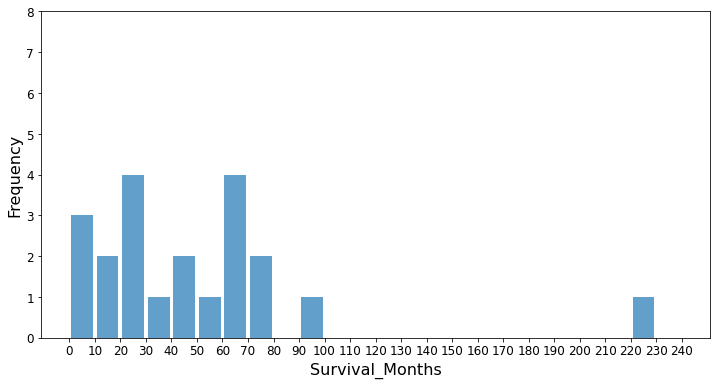

26.463815789999998 36.82082249199392


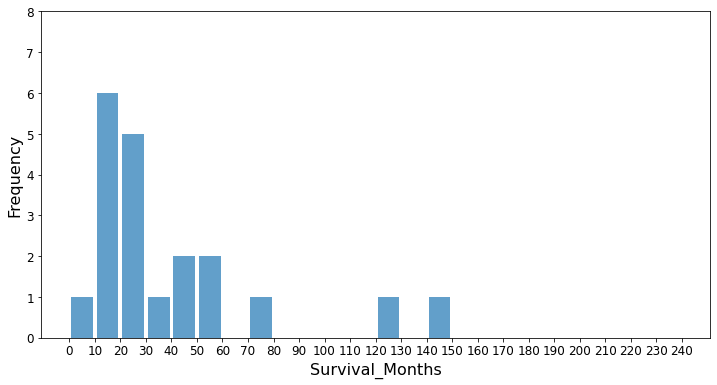

28.05921053 38.20278846056835


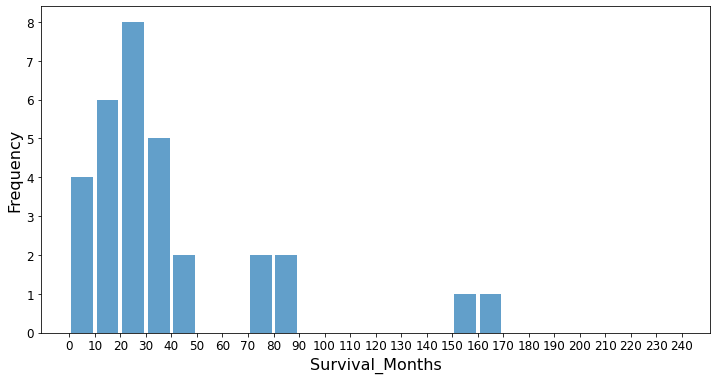

161.1184211
P-value: 0.05882706250712986
Median Survival (Sensitive): inf
Median Survival (Resistant): 76.9


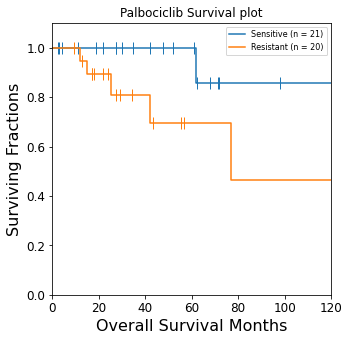

In [267]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

km_fig_palbo = genie_analysis_majority_2sets(test_data, genie_drug_data, drug, cut_off=20, resp_th=5)

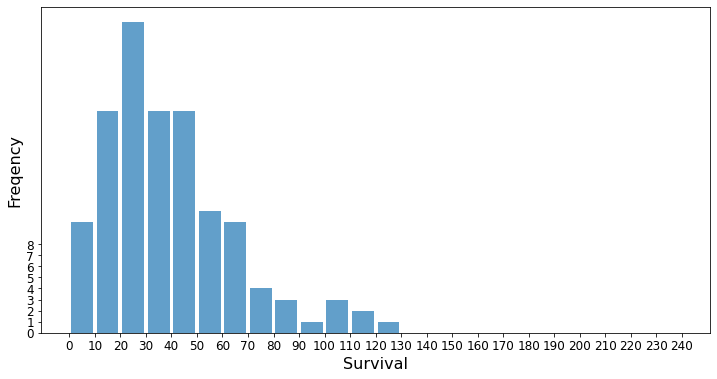

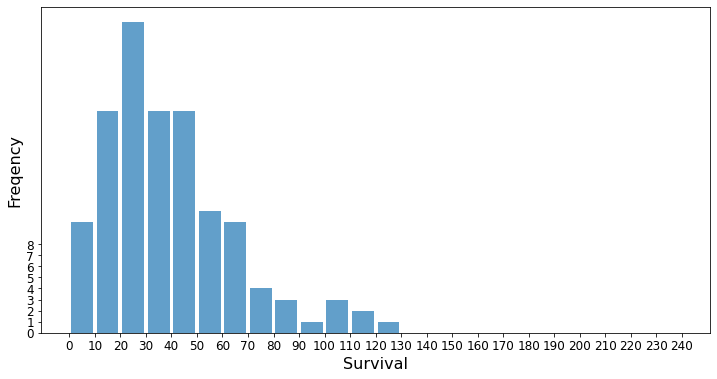

In [255]:
create_histogram(list(genie_non_drug_data['Overall_Survival_Months']), 'Survival', 'Freqency')

In [ ]:
km_fig_palbo.savefig('../plots/figure6/survival_' + drug + '_April_09.svg')

Sample size: 133
Sample size: 73
p-value: 0.0514
Median Survival (Sensitive): inf
Median Survival (Resistant): 76.9


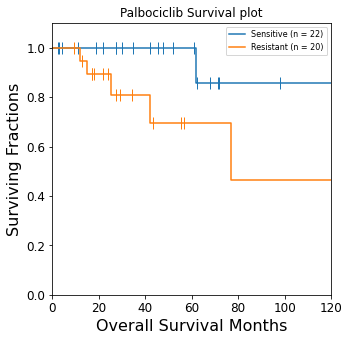

p-value: 0.8218
Median Survival (Sensitive): 35.7
Median Survival (Resistant): 61.6


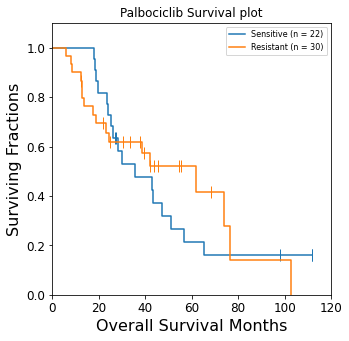

                              sum_sq    df         F    PR(>F)
C(treated)                225.321663   1.0  0.409450  0.526300
C(response)               121.290225   1.0  0.220406  0.641562
C(treated):C(response)    531.417644   1.0  0.965682  0.332318
Residual                19810.896996  36.0       NaN       NaN


In [315]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

survival_df, _ = genie_analysis_majority(test_data, genie_drug_data, drug, fraction=0.5, resp_th=5)
#survival_df, _ = genie_analysis_majority_4sets(test_data, genie_drug_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)
#survival_df.drop(survival_df[survival_df['response'] == -1].index, inplace=True)
#survival_df.loc[survival_df['response'] == -2, 'response'] = -1
survival_df.drop(survival_df[survival_df['response'] == 0].index, inplace=True)
survival_df['treated'] = 1

non_survival_df, _ = genie_analysis_majority(test_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)
non_survival_df.drop(non_survival_df[non_survival_df['response'] == 0].index, inplace=True)
non_survival_df['treated'] = -1

merged_data_df = pd.concat([survival_df, non_survival_df], axis=0, ignore_index=True)
merged_data_df.drop(merged_data_df[merged_data_df['event'] == 0].index, inplace=True)

formula = 'Survival_Months ~ C(treated) + C(response) + C(treated)*C(response)'
model = ols(formula, data=merged_data_df).fit()
print(sm.stats.anova_lm(model, typ=2))

In [316]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Survival_Months   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.4938
Date:                Mon, 25 Apr 2022   Prob (F-statistic):              0.689
Time:                        22:10:20   Log-Likelihood:                -180.86
No. Observations:                  40   AIC:                             369.7
Df Residuals:                      36   BIC:                             376.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           32.5561      5.690      5.722      0.000      21.017      44.095
C(treated)[T.1]                      1.6478     11.934      0.138      0.891     -22.556      25.852
C(response)[T.1]                     1.2423      8.046      0.154      0.878     -15.076      17.561
C(treated)[T.1]:C(response)[T.1]    26.4617     26.928      0.983      0.332     -28.150      81.074
==============================================================================
Omnibus:                       11.769   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.483
Skew:                           1.220   Prob(JB):                      0.00321
Kurtosis:                       3.969   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
km_fig_palbo_all.savefig('../plots/figure6/survival_majority_3curves_April_22.svg')

Sample size: 133
Sample size: 73
Treated Sens vs Part res 0.13677334150035414
Treated Sens vs Strong res 0.01327800013161579
Treated Sens vs Untreated 0.0005306921123391078
Treated Part Res vs Untreated 0.10826513520397109
Treated Strong Res vs Untreated 0.6956814634377286
Median Survival (Sensitive): inf
Median Survival (Partially Resistant): inf
Median Survival (Strongly Resistant): 76.9
Median Survival (Untreated): 46.4


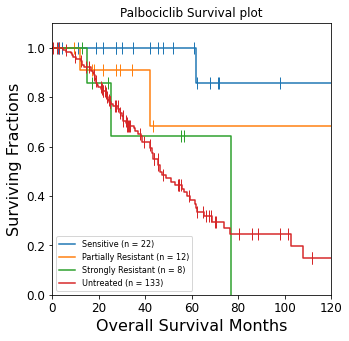

In [257]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

km_majority_4sets = genie_analysis_majority_4sets(test_data, genie_drug_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)

In [179]:
km_majority_4sets.savefig('../plots/figure6/survival_majority_4curves_April_22.svg')

Sample size: 133
Sample size: 73
Treated Sens vs Part res 0.13677334150035414
Treated Sens vs Strong res 0.01327800013161579
Median Survival (Sensitive): inf
Median Survival (Partially Resistant): inf
Median Survival (Strongly Resistant): 76.9


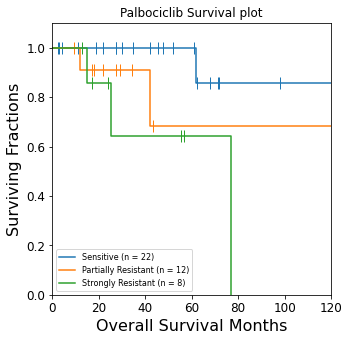

In [181]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

km_majority_3sets = genie_analysis_majority_3sets(test_data, genie_drug_data, drug, fraction=0.5, resp_th=5)

In [182]:
km_majority_3sets.savefig('../plots/figure6/survival_majority_3curves_only_treated_April_22.svg')

Sample size: 133
p-value: 0.8218
Median Survival (Sensitive): 35.7
Median Survival (Resistant): 61.6


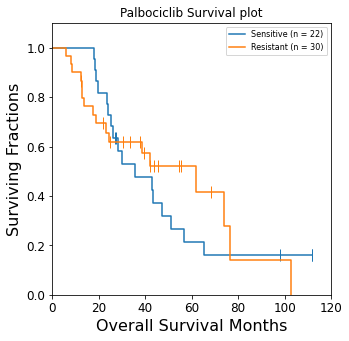

In [184]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

_, km_majority_untreated = genie_analysis_majority(test_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)

In [185]:
km_majority_untreated.savefig('../plots/figure6/survival_majority_untreated_April_22.svg')

Sample size: 133
Sample size: 73
Treated 0.040123650059195964
Treated Sens vs Untreated 0.0035141033032720687
Treated Res vs Untreated 0.44107402810451823
Median Survival (Sensitive): inf
Median Survival (Resistant): 76.9
Median Survival (Untreated): 46.4


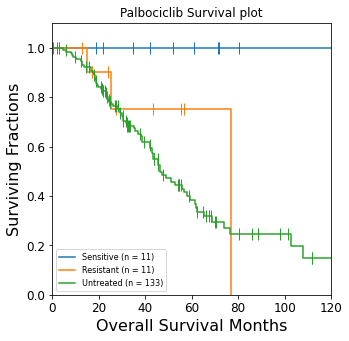

In [194]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

km_max_3curves = genie_analysis_avg_all(test_data, genie_drug_data, genie_non_drug_data, drug, fraction=0.16)

In [195]:
km_max_3curves.savefig('../plots/figure6/survival_max_3curves_April_22.svg')

Sample size: 133
Treated 0.9607034899000957
Median Survival (Sensitive): 38.7
Median Survival (Resistant): 55.9


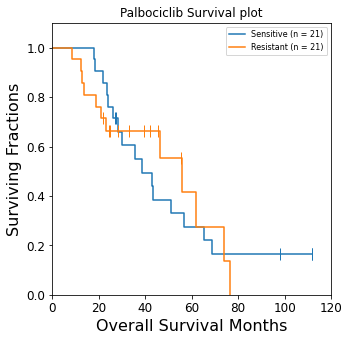

In [196]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

km_max_untreated = genie_analysis_avg(test_data, genie_non_drug_data, drug, fraction=0.16)

In [197]:
km_max_untreated.savefig('../plots/figure6/survival_max_untreated_April_22.svg')

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

survival_df, km_fig_non_palbo = genie_analysis_majority(test_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)

In [ ]:
km_fig_non_palbo.savefig('../plots/figure6/survival_non_' + drug + '_April_09.svg')

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

p_val_part, p_val_strong, km_fig_non_palbo_3 = genie_analysis_majority_3sets(test_data, genie_non_drug_data, drug, fraction=0.5, resp_th=5)

print('Part res', p_val_part)
print('Strong res', p_val_strong)

In [ ]:
km_fig_non_palbo_3.savefig('../plots/figure6/survival_non_' + drug + '_3_curves_April_04.svg')

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

genie_analysis(test_data, genie_drug_data, drug, res_type=1, fraction=0.2)

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_analysis(test_data, genie_non_drug_data, drug, res_type=1, fraction=0.16)

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

genie_analysis_3sets(test_data, genie_drug_data, drug)

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

genie_analysis_all(test_data, genie_drug_data, genie_non_drug_data, drug, res_type=1, fraction=0.16)

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

genie_analysis_4sets(test_data, genie_drug_data, genie_non_drug_data, drug)

In [ ]:
cl_rlipp_df = pd.read_csv('../models/rlipp/' + drug + '_all_pval.txt', sep='\t')[['Term', 'Name', 'P_rho_mean']]
genie_rlipp_df = pd.read_csv('../models/rlipp/' + drug + '_all_pval_genie_428.txt', sep='\t')[['Term', 'Name', 'P_rho_mean']]

merged_df = pd.merge(cl_rlipp_df, genie_rlipp_df, on=['Term', 'Name'], suffixes=('_cl', '_genie'))
merged_df.fillna(0, inplace=True)

merged_df['hue'] = ''
for i, row in merged_df.iterrows():
    genie = row['P_rho_mean_genie']
    cl = row['P_rho_mean_cl']
    if genie < 0.4 and cl < 0.4:
        merged_df.at[i, 'hue'] = 'none'
    elif genie/cl >= 0.66 and genie/cl <= 1.5:
        merged_df.at[i, 'hue'] = 'genie_cell'
    elif genie/cl < 0.66:
        merged_df.at[i, 'hue'] = 'cell'
    elif genie/cl > 1.5:
        merged_df.at[i, 'hue'] = 'genie'

scatterplot_sys = create_scatter_plot_systems(merged_df['P_rho_mean_genie'], merged_df['P_rho_mean_cl'], merged_df['hue'],
                                      'System Importance\n(Clinical samples)', 'System Importance\n(Cell lines)')
print('Spearman rho:', stats.spearmanr(merged_df['P_rho_mean_cl'], merged_df['P_rho_mean_genie'])[0])

In [ ]:
scatterplot_sys.savefig('../plots/figure6/scatterplot_system_importance_hue_all_March_29.svg')

In [ ]:
cdk_pos = 0
cdk_neg = 0
for _,row in cl_rlipp_df.iterrows():
    #if row['P_rho_mean'] < 0.5:
    #    continue
    if 'CDK4' in term_all_genes[row['Term']] or 'CDK6' in term_all_genes[row['Term']]:
        print(row['Name'])
        cdk_pos += 1
    else:
        cdk_neg += 1

print(cdk_pos, cdk_neg)

In [ ]:
drug = 'Palbociclib'
fold_size = 5

for i in range(1, fold_size+1):
    create_gene_rho(drug, gene_list, '')
    create_gene_rho(drug, gene_list, '_genie_428')

In [ ]:
aggregate_gene_rho(drug, gene_list, '')
aggregate_gene_rho(drug, gene_list, '_genie_428')

In [ ]:
cell_gene_rho_df = pd.read_csv('../models/rlipp/' + drug + '_all_gene_rho.txt', sep='\t')[['Gene', 'Rho']]
genie_gene_rho_df = pd.read_csv('../models/rlipp/' + drug + '_all_gene_rho_genie_428.txt', sep='\t')[['Gene', 'Rho']]

merged_gene_rho_df = pd.merge(cell_gene_rho_df, genie_gene_rho_df, on=['Gene'], suffixes=('_cl', '_genie'))
merged_gene_rho_df.dropna(inplace=True)
scatterplot_gene_rho = create_scatter_plot_genes(merged_gene_rho_df['Rho_genie'], merged_gene_rho_df['Rho_cl'],
                                         'Gene Importance\n(Clinical samples)', 'Gene Importance\n(Cell lines)')
print('Spearman rho:', stats.spearmanr(merged_gene_rho_df['Rho_genie'], merged_gene_rho_df['Rho_cl'])[0])

In [ ]:
scatterplot_gene_rho.savefig('../plots/figure6/scatterplot_gene_rho_March_28.svg')

0.04621460431063096


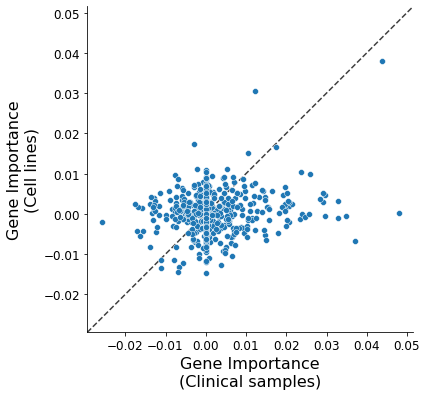

In [319]:
mutations = pd.read_csv('../data/training_files_av/cell2mutation_ctg_av.txt', header=None, names=gene_list)
cn_deletions = pd.read_csv('../data/training_files_av/cell2cndeletion_ctg_av.txt', header=None, names=gene_list)
cn_amplifications = pd.read_csv('../data/training_files_av/cell2cnamplification_ctg_av.txt', header=None, names=gene_list)
#cell_features = np.array(mutations | cn_deletions | cn_amplifications)
cell_features = np.array(mutations)

mutations = pd.read_csv('../data/GENIE/cell2mutation_428.txt', header=None, names=gene_list)
cn_deletions = pd.read_csv('../data/GENIE/cell2cndeletion_428.txt', header=None, names=gene_list)
cn_amplifications = pd.read_csv('../data/GENIE/cell2cnamplification_428.txt', header=None, names=gene_list)
#genie_features = np.array(mutations | cn_deletions | cn_amplifications)
genie_features = np.array(mutations)

gene_sp = gene_importance(drug, cell_features, genie_features, gene_list, fold_size=5)

In [ ]:
gene_sp.savefig('../plots/figure6/scatterplot_gene_importance_cn_deletions_April_16.svg')

In [ ]:
system_names = ['NEST:132', 'NEST:85', 'NEST:17']

drug = 'Palbociclib'

for s in system_names:

    test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])

    genie_drug_data = genie_data.query("Sample_ID in @sample_list")
    genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
    genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
    genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
    genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
    genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
    genie_drug_data.reset_index(drop=True, inplace=True)

    p_val, km_fig_sys = genie_analysis_system(s, test_data, genie_drug_data, drug, resp_th=5)
    print(s, p_val)
    #km_fig_sys.savefig('../plots/figure6/survival_' + s + '.svg')

In [ ]:
system_names = ['NEST:132', 'NEST:85', 'NEST:17']

drug = 'Palbociclib'

for s in system_names:

    test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])

    genie_drug_data = genie_data.query("Sample_ID in @sample_list")
    genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
    genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
    genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']

    pos_samples = list(genie_drug_data['Sample_ID'])
    genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
    genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
    genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
    genie_non_drug_data.reset_index(drop=True, inplace=True)
    
    p_val, km_fig_sys = genie_analysis_system(s, test_data, genie_non_drug_data, drug, resp_th=5)
    print(s, p_val)
    #km_fig_sys.savefig('../plots/figure6/survival_' + s + '.svg')

In [ ]:
#nest132_genes = ['TP53', 'MYC', 'RB1', 'EGFR', 'FRS2', 'ERBB3', 'ERBB4', 'FGF7', 'EGF', 'IGF2', 'FGF2', 'FGF5', 'FGF1', 'IGF1']
nest132_genes = ['RB1', 'EGFR', 'ERBB4']

drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])

genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data.reset_index(drop=True, inplace=True)

pval, fig = genie_analysis_gene_embeddings(nest132_genes, test_data, genie_drug_data, drug, resp_th=5)

print("{}\t{:.4f}".format('132 genes', pval))

In [ ]:
drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data.reset_index(drop=True, inplace=True)

pval, fig = genie_analysis_gene_embeddings(nest132_genes, test_data, genie_non_drug_data, drug, resp_th=5)
    
print("{}\t{:.4f}".format('132 genes', pval))

In [ ]:
nest85_genes = ['CREBBP', 'EP300', 'AR']

drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])

genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data.reset_index(drop=True, inplace=True)

pval, fig = genie_analysis_gene_embeddings(nest85_genes, test_data, genie_drug_data, drug, resp_th=5)

print("{}\t{:.4f}".format('85 genes', pval))

In [ ]:
nest85_genes = ['CREBBP', 'EP300', 'AR']

drug = 'Palbociclib'

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data.reset_index(drop=True, inplace=True)

pval, fig = genie_analysis_gene_embeddings(nest85_genes, test_data, genie_non_drug_data, drug, resp_th=5)
    
print("{}\t{:.4f}".format('85 genes', pval))

In [ ]:
drug = 'Palbociclib'
title = 'RB1'
gene_feature_map = {'RB1':['m','d']}

gene_alterations = np.zeros(len(sample_map), dtype=int)
for g, feature_list in gene_feature_map.items():
    for f in feature_list:
        if f == 'm':
            mutations = np.array(pd.read_csv('../data/GENIE/cell2mutation_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(mutations))
            gene_alterations |= mutations
        elif f == 'a':
            amplifications = np.array(pd.read_csv('../data/GENIE/cell2cnamplification_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(amplifications))
            gene_alterations |= amplifications
        else:
            deletions = np.array(pd.read_csv('../data/GENIE/cell2cndeletion_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(deletions))
            gene_alterations |= deletions
            
print(np.count_nonzero(gene_alterations))

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

survival_df, km_fig_rb1 = genie_analysis_gene_alterations(gene_alterations, sample_map, genie_drug_data, genie_non_drug_data, title, is_resistant=True)

In [ ]:
km_fig_rb1.savefig('../plots/figure6/survival_' + title + '_3curves_April_19.svg')

In [ ]:
drug = 'Palbociclib'
title = 'CCND1'
gene_feature_map = {'CCND1':['a']}

gene_alterations = np.zeros(len(sample_map), dtype=int)
for g, feature_list in gene_feature_map.items():
    for f in feature_list:
        if f == 'm':
            mutations = np.array(pd.read_csv('../data/GENIE/cell2mutation_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(mutations))
            gene_alterations |= mutations
        elif f == 'a':
            amplifications = np.array(pd.read_csv('../data/GENIE/cell2cnamplification_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(amplifications))
            gene_alterations |= amplifications
        else:
            deletions = np.array(pd.read_csv('../data/GENIE/cell2cndeletion_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(deletions))
            gene_alterations |= deletions
            
print(np.count_nonzero(gene_alterations))

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']

pos_samples = list(genie_drug_data['Sample_ID'])
genie_non_drug_data = genie_data.query("Sample_ID not in @pos_samples").copy()
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['HER2_Status'] != 'Positive']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_non_drug_data))
genie_non_drug_data.reset_index(drop=True, inplace=True)

genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_drug_data = genie_drug_data[genie_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
print('Sample size:', len(genie_drug_data))
genie_drug_data.reset_index(drop=True, inplace=True)

survival_df, km_fig_ccnd1 = genie_analysis_gene_alterations(gene_alterations, sample_map, genie_drug_data, genie_non_drug_data, title, is_resistant=False)

In [ ]:
km_fig_ccnd1.savefig('../plots/figure6/survival_' + title + '_3curves_April_19.svg')

In [ ]:
#132 Resistant

drug = 'Palbociclib'
title = 'CCNE1'
gene_feature_map = {'CCNE1':['a']}

gene_alterations = np.zeros(len(sample_map), dtype=int)
for g, feature_list in gene_feature_map.items():
    for f in feature_list:
        if f == 'm':
            mutations = np.array(pd.read_csv('../data/GENIE/cell2mutation_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(mutations))
            gene_alterations |= mutations
        elif f == 'a':
            amplifications = np.array(pd.read_csv('../data/GENIE/cell2cnamplification_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(amplifications))
            gene_alterations |= amplifications
        else:
            deletions = np.array(pd.read_csv('../data/GENIE/cell2cndeletion_428.txt', header=None, names=gene_list)[g])
            print(g, f, np.count_nonzero(deletions))
            gene_alterations |= deletions
            
print(np.count_nonzero(gene_alterations))

test_data = pd.read_csv("../data/GENIE/test_428_" + drug + ".txt", sep='\t', header=None, names=['cell_line', 'smiles', 'auc', 'dataset'])
    
genie_drug_data = genie_data.query("Sample_ID in @sample_list")
genie_drug_data = genie_drug_data[genie_drug_data[func_map[drug]] == 'Yes']
genie_drug_data = genie_drug_data[genie_drug_data['mTOR_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['AKT_Inhibitor_Overall'] == 'No']
genie_drug_data = genie_drug_data[genie_drug_data['HER2_Status'] != 'Positive']
genie_drug_data = genie_drug_data[genie_drug_data['ER_PR_Receptor_Change'] != 'ER- & PR-']
genie_non_drug_data = genie_non_drug_data[genie_non_drug_data['Number_of_Endocrine_Therapies_received_in_Metastatic_Treatment'] > 0]
genie_drug_data.reset_index(drop=True, inplace=True)

survival_df, km_fig_ccne1 = genie_analysis_gene_alterations(gene_alterations, sample_map, genie_drug_data, title, is_resistant=False)

In [ ]:
km_fig_ccne1.savefig('../plots/figure6/survival_' + title + '_April_09.svg')

In [ ]:
print(genie_drug_data.columns)